In [1]:
import pandas as pd

In [2]:
from numpy.linalg import inv
import numpy as np
from scipy.linalg import eig

from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

from diffmaps_util import *

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
%matplotlib nbagg

In [6]:
df = pd.read_csv('annulus.csv')
df = df[['X', 'Y']]
df.head()

,X,Y
0,1.303494,-1.088609
1,-1.307464,1.993007
2,-0.032100,0.241350
3,-1.094944,-0.253496
4,0.430289,0.280286


In [7]:
X = df.as_matrix()

<IPython.core.display.Javascript object>


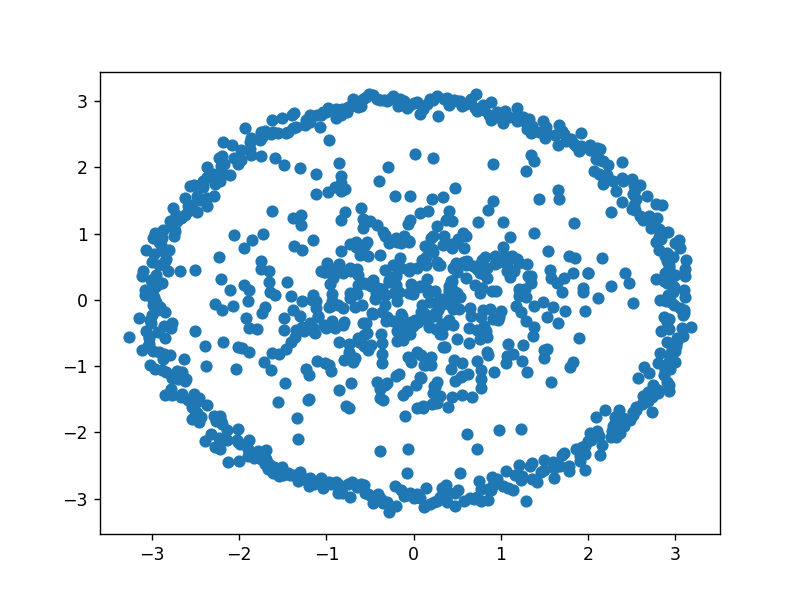

In [8]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [29]:
L = k(X, .1)
print 'L shape %s %s' % L.shape
D = diag(L)
print 'D shape %s %s' % D.shape

M = inv(D).dot(L)
print 'M shape %s %s' % M.shape

w, v = eig(M)
w = np.abs(w.real)
v = v.real
print 'eigenvalue shape %s' % w.shape
print 'eigenvector shape %s %s' % v.shape

L shape 1000 1000
D shape 1000 1000
M shape 1000 1000
eigenvalue shape 1000
eigenvector shape 1000 1000


In [30]:
w, v = sort_eigens(w, v)
print 'eigenvalue shape %s' % w.shape
print 'eigenvector shape %s %s' % v.shape

eigenvalue shape 1000
eigenvector shape 1000 1000


In [31]:
psi = v / v[:,0]
psi.shape

(1000L, 1000L)

In [32]:
diffmap = (w.reshape(-1,1) * psi.T).T[:,1:]
diffmap.shape

(1000L, 999L)

<IPython.core.display.Javascript object>


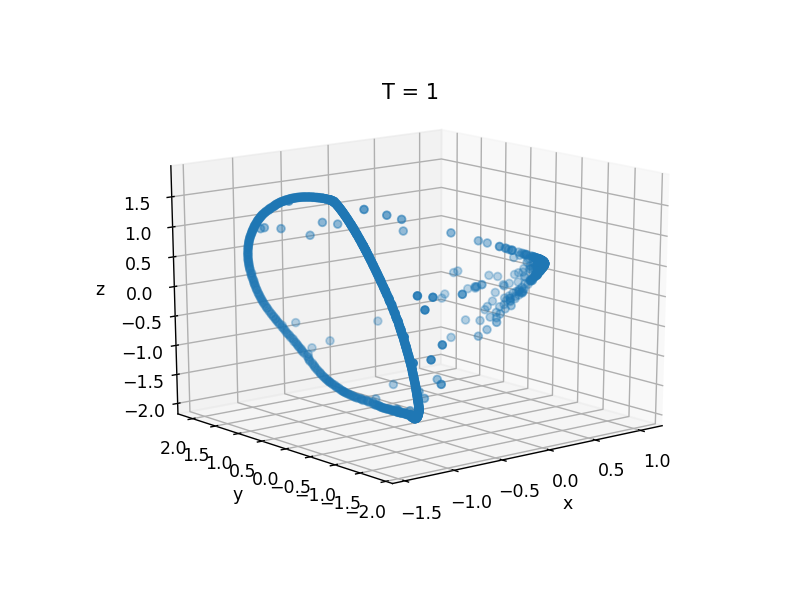

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
diffmap = (w.reshape(-1,1) * psi.T).T[:,1:]
diffmap.shape
ax.scatter(diffmap[:,0], diffmap[:,1], diffmap[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('T = 1')